In [1]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics 

Using TensorFlow backend.


In [2]:
Train_data = pd.read_csv("mnist_train.csv")
print("Shape ",Train_data.shape)
Train_data.head()


Shape  (60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Test_data = pd.read_csv("mnist_test.csv")
print(Test_data.shape)
Test_data.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_Train=Train_data['label']
X_Train=Train_data.drop('label',axis=1)

X_Train=np.array(X_Train)
Y_Train=np.array(Y_Train)

Y_Test=Test_data['label']
X_Test=Test_data.drop('label',axis=1)

X_Test=np.array(X_Test)
Y_Test=np.array(Y_Test)

print("train data : ",X_Train.shape," Train_label: ",Y_Train.shape," TestData ",X_Test.shape," test Label: ",Y_Test.shape)

train data :  (60000, 784)  Train_label:  (60000,)  TestData  (10000, 784)  test Label:  (10000,)


In [5]:
def showImage(img):
    plt.figure(figsize=(4,4))
    img_view=np.reshape(img, (28,28))
    plt.imshow(img_view,cmap='gray')
    plt.show

Label  5


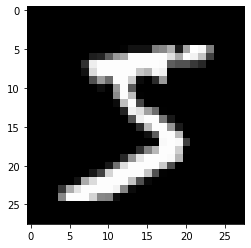

In [6]:
#demo Image
print("Label ",Y_Train[0])
showImage(X_Train[0])


# classification with KNN

In [7]:
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_Train, Y_Train)
pred = knn.predict(X_Test) 

acc= metrics.accuracy_score(Y_Test, pred)*100
print("kNN model accuracy: ", acc ,"%")

kNN model accuracy:  96.94 %


predected Value:  7


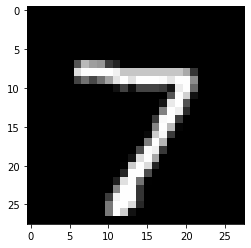

In [8]:
#easy check
showImage(X_Test[0])
p=np.expand_dims(X_Test[0], axis=0)
o=knn.predict(p)
print("predected Value: ",o[0])

# with CNN

In [9]:
train_x = X_Train.reshape(len(X_Train),28,28,-1)
test_x = X_Test.reshape(len(X_Test),28,28,-1)
train_y = to_categorical(Y_Train)
test_y = to_categorical(Y_Test)
print("trainX, testX ",train_x.shape," ",test_x.shape)
print("trainY, testY ",train_y.shape," ",test_y.shape)

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255

#print(x_train[0])

trainX, testX  (60000, 28, 28, 1)   (10000, 28, 28, 1)
trainY, testY  (60000, 10)   (10000, 10)


In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation="relu",input_shape = (28,28,1), use_bias = True))
model.add(Conv2D(32,(3,3), activation="relu", use_bias = True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3), activation="relu", use_bias = True))
model.add(Conv2D(64,(3,3), activation="relu", use_bias = True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation = "relu", use_bias = True))
model.add(Dropout(0.5))
model.add(Dense(10,activation = "softmax",use_bias = True))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)         

In [12]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=15, batch_size=20, shuffle=True, 
                    validation_data=(test_x, test_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1554 - accuracy: 0.9516 - val_loss: 0.0450 - val_accuracy: 0.9853
Epoch 2/15
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0619 - accuracy: 0.9824 - val_loss: 0.0294 - val_accuracy: 0.9913
Epoch 3/15
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0488 - accuracy: 0.9862 - val_loss: 0.0260 - val_accuracy: 0.9915
Epoch 4/15
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.0206 - val_accuracy: 0.9939
Epoch 5/15
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 0.0215 - val_accuracy: 0.9927
Epoch 6/15
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0203 - val_accuracy: 0.9936
Epoch 7/15
60000/60000 [==============================] - 163s

 test_loss  0.024494576390841304  test_acc  99.30999875068665 %


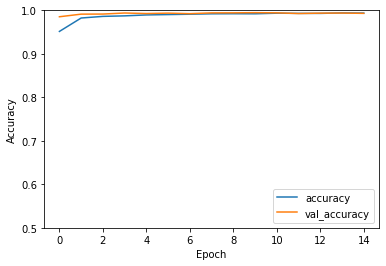

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)
print(" test_loss ",test_loss," test_acc ",test_acc*100,'%')

In [20]:
y_pred = model.predict(test_x) 

y_pred = np.argmax(y_pred, 1) 
print(y_pred)
Ytest = np.argmax(test_y, 1) 
print(Ytest)
#mat = confusion_matrix(Y_test, Y_pred) 
acc= metrics.accuracy_score(Ytest, y_pred)*100
print("CNN model accuracy: ", acc ,"%")

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
CNN model accuracy:  99.31 %


predicted value:  9


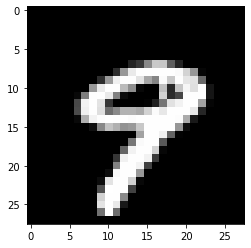

In [14]:
#random prediction
#print(test_x[9])
img=test_x[9].reshape(1,28,28,1)    
rs= model.predict(img)
print("predicted value: ", np.argmax(rs))
showImage(img)

# Tkinter Interface


In [22]:
def predict_digit_KNN(img):
    img = img.convert('L')
    img = img.resize((28,28))
    img = np.array(img)
    img=img.flatten()
    img=255.0-img    
    p=np.expand_dims(img, axis=0)
    res = knn.predict(p)
    return res[0]


In [23]:
def predict_digit_CNN(img):
    img = img.convert('L')
    img = img.resize((28,28))
    img = np.array(img)
    img=img.astype('float32')
    img=255.0-img
    img=img/255.0
    #print(img[:100])
    #showImage(img)
    img = img.reshape(1,28,28,1)    
    res = model.predict([img])
    #print(np.argmax(res))
    return np.argmax(res)


In [30]:
def draw_lines(event):
    x=event.x
    y=event.y
    r=10
    mycanvas.create_oval(x-r, y-r, x + r, y + r, fill='black')
    
def clear_all():
        mycanvas.delete("all")
        
def classify_with_KNN():
        HWND = mycanvas.winfo_id() 
        #print(HWND)
        rect = win32gui.GetWindowRect(HWND) 
        im = ImageGrab.grab(rect)
        digit = predict_digit_KNN(im)
        #print(digit)
        mylabel.configure(text= str(digit) + " predicted in KNN")       

def classify_with_CNN():
        HWND = mycanvas.winfo_id() 
        rect = win32gui.GetWindowRect(HWND)
        im = ImageGrab.grab(rect)
        digit = predict_digit_CNN(im)
        mylabel.configure(text= str(digit)+ " predicted in CNN")       
 

root = tk.Tk()
mycanvas= Canvas(root, width=300, height=300,bg = "white", cursor="cross")
mylabel=Label(text="Let Me think..", font=("Courier", 44) ,bg ="yellow",pady=2, padx=2)
clear=Button(text = "Clear",command =clear_all) 
classifyWithKNN = Button(text = "classifyWithKNN",command =classify_with_KNN)
classifyWithCNN = Button(text = "classify_With_CNN",command =classify_with_CNN)

mycanvas.grid(row=0, column=0, padx=10)
mylabel.grid(row=0,column=1)
clear.grid(row=1, column=0,pady=10)
classifyWithKNN.grid(row=2, column=0,pady=10 )
classifyWithCNN.grid(row=3, column=0,pady=10 )

mycanvas.bind("<B1-Motion>",draw_lines)
root.mainloop()